<a href="https://colab.research.google.com/github/AmandaLivramento/AmandaLivramento/blob/main/AV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 7.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
!pip install requests --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf #Instalando e importando a API no código
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
import requests
url = "https://investnews.com.br/financas/veja-a-lista-completa-dos-bdrs-disponiveis-para-pessoas-fisicas-na-b3/"
r = requests.get(url)
html = r.text
df_nomes_tickers = pd.read_html(html, header=0)[0]
df_nomes_tickers.head(10)

,EMPRESA,CÓDIGO,SETOR,PAÍS DE ORIGEM
0,3M,MMMC34,Indústria diversificada,EUA
1,AB INBEV,ABUD34,Bebidas,Bélgica
2,ABB LTD,A1BB34,Industrial,Switzerland
3,ABBOTT,ABTT34,Farmacêuticos,EUA
4,ABBVIE,ABBV34,Medicamentos e Outros Produtos,EUA
5,ABIOMED INC,A1BM34,Saúde,EUA
6,ACTIVISION,ATVI34,Tecnologia,EUA
7,ADOBE INC,ADBE34,Tecnologia,EUA
8,ADVANCE AUTO PARTS INC,A1AP34,Peças Automotivas,EUA
9,ADVANCED MIC,A1MD34,Tecnologia,EUA


In [ ]:
with pd.option_context('display.max_rows',10):
  print(df_nomes_tickers)

           EMPRESA  CÓDIGO                                   SETOR  \
0               3M  MMMC34                 Indústria diversificada   
1         AB INBEV  ABUD34                                 Bebidas   
2          ABB LTD  A1BB34                              Industrial   
3           ABBOTT  ABTT34                           Farmacêuticos   
4           ABBVIE  ABBV34          Medicamentos e Outros Produtos   
..             ...     ...                                     ...   
703  RAYTHEON TECH  RYTT34                              Industrial   
704   SCHLUMBERGER  SLBG34  Equipamentos e Serviços de Combustível   
705        TIFFANY  TIFF34                               Joalheria   
706     US BANCORP  USBC34                  Instituição Financeira   
707         XP INC  XPBR31                              Financeiro   

    PAÍS DE ORIGEM  
0              EUA  
1          Bélgica  
2      Switzerland  
3              EUA  
4              EUA  
..             ...  
703         

In [ ]:
import pandas as pd
import matplotlib.pylab as plt
import yfinance as yf
import warnings
import matplotlib
import statsmodels.api as sm

In [ ]:
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'G'

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dados_series = yf.download("MCDC34.SA", start="2022-05-01", end="2022-11-01")

[*********************100%***********************]  1 of 1 completed


In [ ]:
with pd.option_context('display.max_rows',10):
  print(dados_series)

                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2022-05-02  62.150002  63.240002  61.279999  62.279999  61.565479   13242
2022-05-03  62.279999  62.490002  60.759998  61.340000  60.636265    6442
2022-05-04  61.360001  62.630001  61.360001  62.169998  61.456741    3720
2022-05-05  62.900002  63.259998  61.259998  61.259998  60.557178    9656
2022-05-06  61.270000  64.099998  61.270000  63.700001  62.969189    7866
...               ...        ...        ...        ...        ...     ...
2022-10-25  67.459999  68.419998  67.459999  67.900002  67.900002   13274
2022-10-26  67.930000  69.519997  67.800003  67.800003  67.800003   12809
2022-10-27  69.300003  70.730003  69.300003  70.449997  70.449997   33943
2022-10-28  70.820000  73.449997  70.800003  71.510002  71.510002   24513
2022-10-31  72.800003  73.120003  70.150002  70.500000  70.500000   11886

[128 rows x 6 columns]


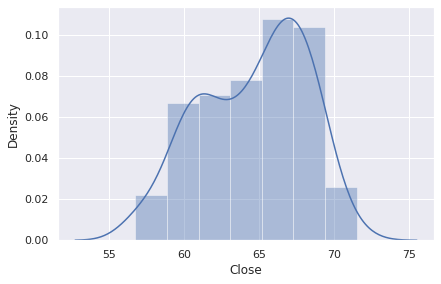

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.distplot(dados_series['Close'].dropna())

In [ ]:
dados_series = yf.download("MCDC34.SA", start="2022-05-01", end="2022-11-01")

[*********************100%***********************]  1 of 1 completed


In [ ]:
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'colab'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [ ]:
import plotly.offline as py
import plotly.graph_objs as go
dados_grafico = [go.Scatter(x=dados_series.index, y=dados_series['Close'])]
py.iplot(dados_grafico)

In [ ]:
df = dados_series.drop(['Open','High', 'Low', 'Adj Close', 'Volume'], axis=1)

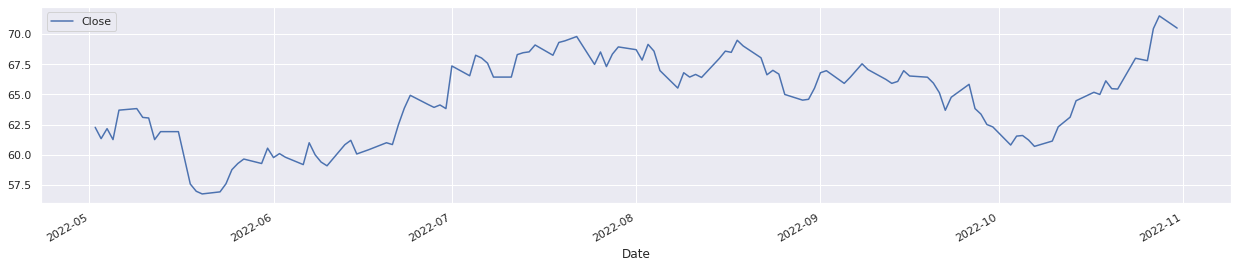

In [ ]:
df.plot(figsize = (19, 4)) 
plt.show()

In [ ]:
dados_series = yf.download("NFLX34.SA", start="2022-05-01", end="2022-11-01")

[*********************100%***********************]  1 of 1 completed


In [ ]:
with pd.option_context('display.max_rows',10):
  print(dados_series)

                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2022-05-02  19.100000  20.200001  19.100000  20.080000  20.080000  1185952
2022-05-03  20.209999  20.219999  19.610001  19.900000  19.900000  1098539
2022-05-04  20.000000  20.090000  19.160000  20.090000  20.090000   497319
2022-05-05  19.940001  20.000000  18.719999  18.760000  18.760000  1395344
2022-05-06  18.910000  19.090000  17.959999  18.480000  18.480000   719268
...               ...        ...        ...        ...        ...      ...
2022-10-25  29.990000  31.549999  29.990000  30.660000  30.660000   750983
2022-10-26  30.750000  32.520000  30.660000  32.200001  32.200001   618302
2022-10-27  31.860001  32.200001  31.410000  31.570000  31.570000   436692
2022-10-28  31.690001  32.160000  31.260000  31.290001  31.290001   590931
2022-10-31  31.400000  31.680000  29.959999  30.040001  30.040001   533818

[128 rows x 6 columns]


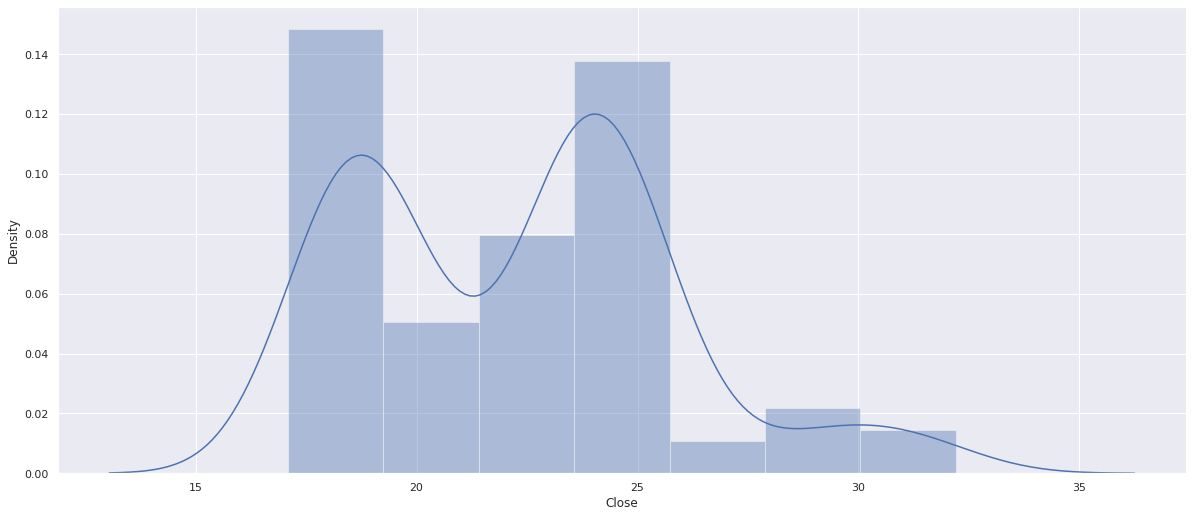

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.distplot(dados_series['Close'].dropna())

In [ ]:
dados_series = yf.download("NFLX34.SA", start="2022-05-01", end="2022-11-01")

[*********************100%***********************]  1 of 1 completed


In [ ]:
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'colab'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [ ]:
import plotly.offline as py
import plotly.graph_objs as go
dados_grafico = [go.Scatter(x=dados_series.index, y=dados_series['Close'])]
py.iplot(dados_grafico)

In [ ]:
df = dados_series.drop(['Open','High', 'Low', 'Adj Close', 'Volume'], axis=1)

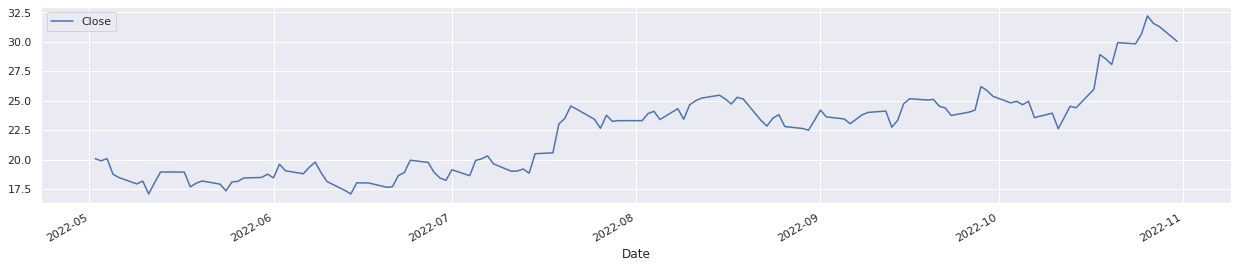

In [ ]:
df.plot(figsize = (19, 4)) 
plt.show()

In [ ]:
dados_series = yf.download("PAGS34.SA", start="2022-05-01", end="2022-11-01")

[*********************100%***********************]  1 of 1 completed


In [ ]:
with pd.option_context('display.max_rows',10):
  print(dados_series)

             Open   High    Low  Close  Adj Close  Volume
Date                                                     
2022-05-02  14.53  15.00  14.43  14.99      14.99    3958
2022-05-03  15.00  15.00  14.10  14.30      14.30    4526
2022-05-04  15.00  15.00  12.81  14.49      14.49   30045
2022-05-05  14.00  14.00  12.92  13.17      13.17   20143
2022-05-06  13.18  13.25  12.29  12.55      12.55   12743
...           ...    ...    ...    ...        ...     ...
2022-10-25  14.43  15.75  14.43  14.81      14.81   35815
2022-10-26  14.82  15.41  14.33  14.33      14.33   15208
2022-10-27  14.70  14.90  13.90  13.90      13.90   19982
2022-10-28  14.49  15.00  13.60  14.00      14.00   20493
2022-10-31  14.00  14.35  13.91  14.15      14.15   42918

[128 rows x 6 columns]


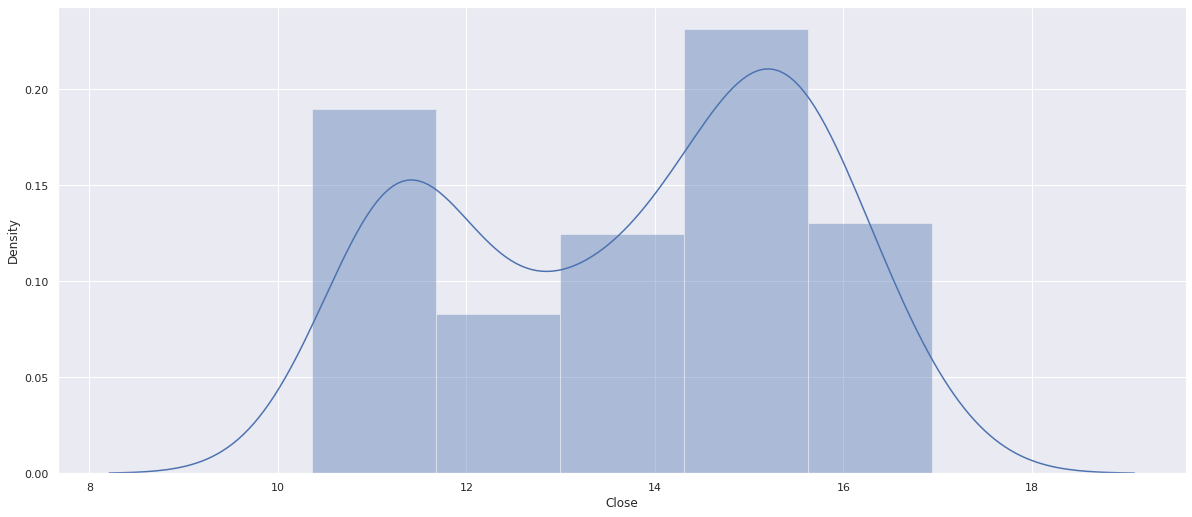

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.distplot(dados_series['Close'].dropna())

In [ ]:
dados_series = yf.download("PAGS34.SA", start="2022-05-01", end="2022-11-01")

[*********************100%***********************]  1 of 1 completed


In [ ]:
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'colab'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [ ]:
import plotly.offline as py
import plotly.graph_objs as go
dados_grafico = [go.Scatter(x=dados_series.index, y=dados_series['Close'])]
py.iplot(dados_grafico)

In [ ]:
df = dados_series.drop(['Open','High', 'Low', 'Adj Close', 'Volume'], axis=1)

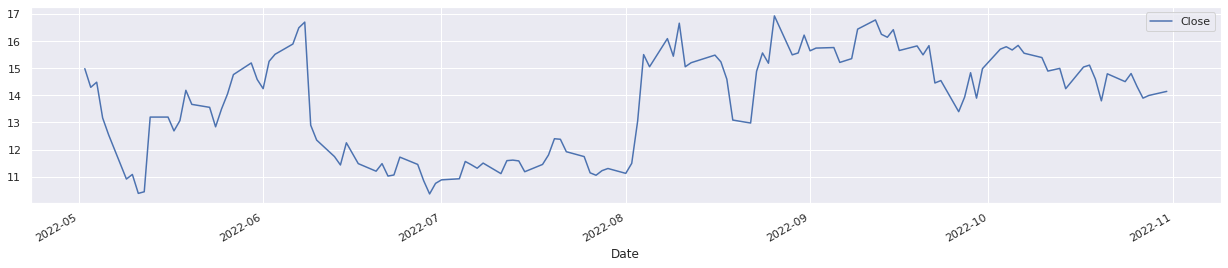

In [ ]:
df.plot(figsize = (19, 4)) 
plt.show()

In [ ]:
dados_series = yf.download("PFIZ34.SA", start="2022-05-01", end="2022-11-01")

[*********************100%***********************]  1 of 1 completed


In [ ]:
with pd.option_context('display.max_rows',10):
  print(dados_series)

                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2022-05-02  60.740002  61.299999  59.779999  61.020000  60.068089   30813
2022-05-03  60.450001  62.480000  59.820000  61.029999  60.077934   42133
2022-05-04  61.360001  61.990002  60.209999  61.220001  60.264973  385355
2022-05-05  61.230000  61.630001  60.049999  60.389999  59.447918  206151
2022-05-06  61.090000  62.299999  61.090000  61.900002  60.934364   42314
...               ...        ...        ...        ...        ...     ...
2022-10-25  60.450001  60.919998  59.820000  60.459999  60.459999   17370
2022-10-26  60.490002  62.360001  60.299999  61.900002  61.900002   31035
2022-10-27  61.290001  61.619999  60.310001  60.490002  60.490002   20604
2022-10-28  60.529999  63.380001  60.529999  62.779999  62.779999   37480
2022-10-31  62.869999  62.959999  60.150002  60.150002  60.150002   17689

[128 rows x 6 columns]


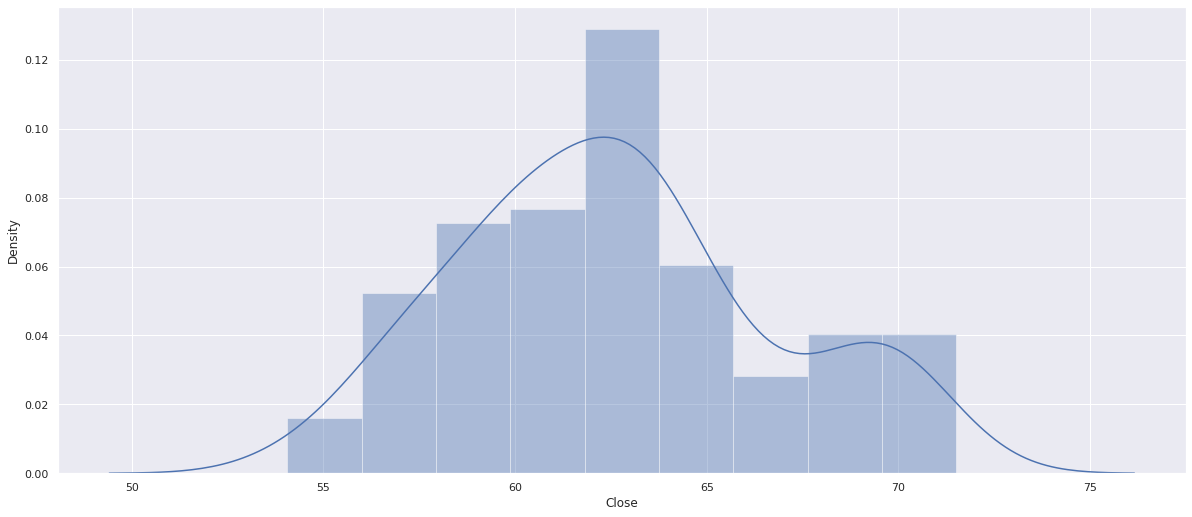

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.distplot(dados_series['Close'].dropna())

In [ ]:
dados_series = yf.download("PFIZ34.SA", start="2022-05-01", end="2022-11-01")

[*********************100%***********************]  1 of 1 completed


In [ ]:
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'colab'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [ ]:
import plotly.offline as py
import plotly.graph_objs as go
dados_grafico = [go.Scatter(x=dados_series.index, y=dados_series['Close'])]
py.iplot(dados_grafico)

In [ ]:
df = dados_series.drop(['Open','High', 'Low', 'Adj Close', 'Volume'], axis=1)

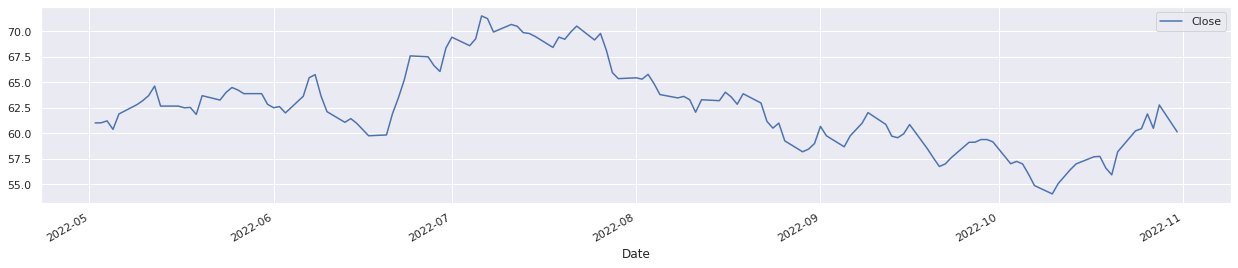

In [ ]:
df.plot(figsize = (19, 4)) 
plt.show()

In [ ]:
dados_series = yf.download("COCA34.SA", start="2022-05-01", end="2022-11-01")

[*********************100%***********************]  1 of 1 completed


In [ ]:
with pd.option_context('display.max_rows',10):
  print(dados_series)

                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2022-05-02  53.700001  54.650002  52.930000  53.009998  52.234142  213900
2022-05-03  53.299999  53.560001  51.840000  51.840000  51.081264   40144
2022-05-04  52.520000  53.669998  52.520000  53.369999  52.588871   22231
2022-05-05  53.610001  54.450001  53.450001  54.290001  53.495411   30239
2022-05-06  54.290001  54.959999  54.220001  54.360001  53.564384   36421
...               ...        ...        ...        ...        ...     ...
2022-10-25  52.299999  52.880001  51.099998  52.160000  52.160000   49128
2022-10-26  52.160000  53.330002  52.160000  53.299999  53.299999   33174
2022-10-27  53.200001  53.200001  52.200001  52.599998  52.599998   19900
2022-10-28  53.009998  54.130001  52.900002  53.619999  53.619999   45686
2022-10-31  53.700001  54.110001  51.400002  51.759998  51.759998   40309

[128 rows x 6 columns]


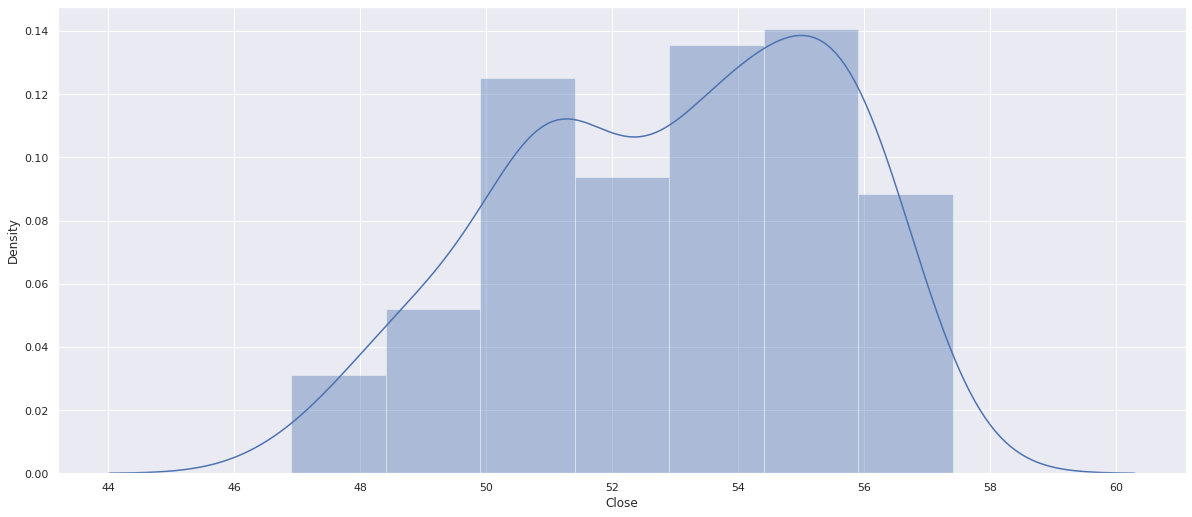

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.distplot(dados_series['Close'].dropna())

In [ ]:
dados_series = yf.download("MCDC34.SA", start="2022-05-01", end="2022-11-01")

[*********************100%***********************]  1 of 1 completed


In [ ]:
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'colab'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [ ]:
import plotly.offline as py
import plotly.graph_objs as go
dados_grafico = [go.Scatter(x=dados_series.index, y=dados_series['Close'])]
py.iplot(dados_grafico)